## Binarização com limiar

Normalmente a imagem é convertida para preto e branco.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('../img/ponte.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suave = cv2.GaussianBlur(img, (7, 7), 0) # aplica blur
(T, bin) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(suave, 160, 255, cv2.THRESH_BINARY_INV)
resultado = np.vstack([
    np.hstack([img, suave]),
    np.hstack([bin, binI])
])
cv2.imshow('Binarização da imagem', resultado)
cv2.waitKey(0)

-1

## Threshold adaptativo

O 160 utilizado nas funções acima foi escolhido arbitrariamente. Porém esse valor pode ser otimizado matematicamente. Parâmetros utilizados: tamanho do kernel e um inteiro a ser subtraído da média calculada dentro do kernel.

In [7]:
bin1 = cv2.adaptiveThreshold(suave, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)
bin2 = cv2.adaptiveThreshold(suave, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)
resultado = np.vstack([
    np.hstack([img, suave]),
    np.hstack([bin1, bin2])
])
cv2.imshow('threshold adaptativo', resultado)
cv2.waitKey(0)

-1

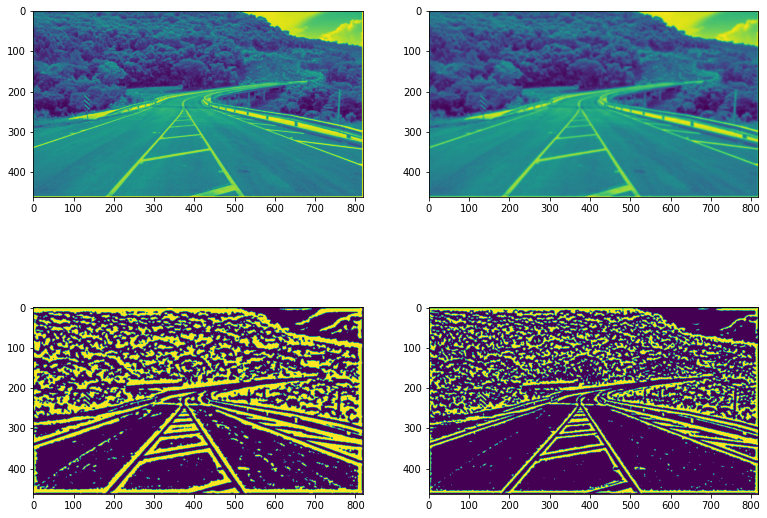

In [8]:
plt.figure(figsize=(13, 10))
plt.subplot(2,2,1), plt.imshow((img))
plt.subplot(2,2,2), plt.imshow(suave)
plt.subplot(2,2,3,), plt.imshow(bin1)
plt.subplot(2,2,4), plt.imshow(bin2)

plt.show()